In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.io as pio

In [36]:
import pandas as pd
import numpy as np

# Read the CSV file
concert_data = pd.read_csv('dataset/Taylor_Train.csv', encoding='latin-1')

# Display the first few rows to understand the structure of the data
print(concert_data.head())

# Check for missing values
print(concert_data.isnull().sum())

# Clean the 'Revenue' column by removing non-numeric characters and converting to numeric type
concert_data['Revenue'] = concert_data['Revenue'].str.replace('$', '').str.replace(',', '').str.replace('\x97', '')

# Replace empty strings with NaN values
concert_data['Revenue'] = concert_data['Revenue'].replace('', np.nan)

# Convert the 'Revenue' column to float
concert_data['Revenue'] = concert_data['Revenue'].astype(float)

# Check the data types of columns
print(concert_data.dtypes)


# Drop rows with missing values
concert_data.dropna(inplace=True)

# Display the cleaned dataset
print(concert_data.head())


               City        Country                      Venue  \
0        Evansville  United States  Roberts Municipal Stadium   
1         Jonesboro  United States         Convocation Center   
2         St. Louis  United States           Scottrade Center   
3        Alexandria  United States  Bishop Ireton High School   
4  North Charleston  United States  North Charleston Coliseum   

               Opening act(s) Attendance (tickets sold / available)   Revenue  \
0  Gloriana\r\nKellie Pickler                         7,463 / 7,463  $360,617   
1  Gloriana\r\nKellie Pickler                         7,822 / 7,822  $340,328   
2  Gloriana\r\nKellie Pickler                       13,764 / 13,764  $650,420   
3  Gloriana\r\nKellie Pickler                                                 
4  Gloriana\r\nKellie Pickler                         8,751 / 8,751  $398,154   

            Tour  
0  Fearless_Tour  
1  Fearless_Tour  
2  Fearless_Tour  
3  Fearless_Tour  
4  Fearless_Tour  
City    

In [43]:
concert_data

,City,Country,Venue,Opening act(s),Attendance (tickets sold / available),Revenue,Tour
0,Evansville,United States,Roberts Municipal Stadium,Gloriana\r\nKellie Pickler,"7,463 / 7,463",360617.0,Fearless_Tour
1,Jonesboro,United States,Convocation Center,Gloriana\r\nKellie Pickler,"7,822 / 7,822",340328.0,Fearless_Tour
2,St. Louis,United States,Scottrade Center,Gloriana\r\nKellie Pickler,"13,764 / 13,764",650420.0,Fearless_Tour
4,North Charleston,United States,North Charleston Coliseum,Gloriana\r\nKellie Pickler,"8,751 / 8,751",398154.0,Fearless_Tour
5,Jacksonville,United States,Jacksonville Veterans Memorial Arena,Gloriana\r\nKellie Pickler,"11,072 / 11,072",507012.0,Fearless_Tour
...,...,...,...,...,...,...,...
440,Sydney,Australia,ANZ Stadium,Charli XCX\r\nBroods,"72,805 / 72,805",7686564.0,Reputation_Stadium_Tour
441,Brisbane,Australia,The Gabba,Charli XCX\r\nBroods,"43,907 / 43,907",4338127.0,Reputation_Stadium_Tour
442,Auckland,New Zealand,Mount Smart Stadium,Charli XCX\r\nBroods,"35,749 / 35,749",3617593.0,Reputation_Stadium_Tour
443,Tokyo,Japan,Tokyo Dome,Charli XCX,"100,109 / 100,109",14859847.0,Reputation_Stadium_Tour


In [47]:
import pandas as pd
import plotly.graph_objects as go
import pandas as pd
import numpy as np

# Read the CSV file
concert_data = pd.read_csv('dataset/Taylor_Train.csv', encoding='latin-1')

# # Display the first few rows to understand the structure of the data
# print(concert_data.head())

# # Check for missing values
# print(concert_data.isnull().sum())

# Clean the 'Revenue' column by removing non-numeric characters and converting to numeric type
concert_data['Revenue'] = concert_data['Revenue'].str.replace('$', '').str.replace(',', '').str.replace('\x97', '')

# Replace empty strings with NaN values
concert_data['Revenue'] = concert_data['Revenue'].replace('', np.nan)

# Convert the 'Revenue' column to float
concert_data['Revenue'] = concert_data['Revenue'].astype(float)

# Check the data types of columns
# print(concert_data.dtypes)


# Drop rows with missing values
concert_data.dropna(inplace=True)

# Step 3: Define data for the globe visualization using choropleth trace
data = go.Choropleth(
    locations=concert_data['Country'],  # Country names
    z=concert_data['Revenue'],  # Values to be color-mapped
    locationmode='country names',  # Define location mode as country names
    colorscale='Viridis',  # Color scale
    colorbar=dict(title='Revenue'),  # Color bar title
    marker_line_color='white'  # Marker line color
)

# Step 4: Define layout for the globe visualization
layout = go.Layout(
    title='Concert Revenue by Country on Globe',  # Title of the plot
    geo=dict(
        showframe=False,  # Hide frame
        showcoastlines=False,  # Hide coastlines
        projection_type='orthographic'  # Orthographic projection for a globe
    )
)

# Step 5: Create figure
fig = go.Figure(data=data, layout=layout)

# Step 6: Show the plot
fig.show()


In [19]:
path_dataset = "./dataset/Spotify-2000.csv"
df = pd.read_csv(path_dataset)
df.head()

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59


In [20]:
# make a new feature Genre using the Top Genre column and assign it to one of the (pop, indie, rock, country, hip hop ) based on which `Top Genre` column contains
# the most of the words in the list ['pop', 'indie', 'rock', 'country', 'hip hop']
df['Genre'] = 'other'
for Genre in ['pop', 'indie', 'rock', 'country', 'hip hop']:
    df.loc[df['Top Genre'].str.contains(Genre), 'Genre'] = Genre
df['Genre'].value_counts()

Genre
rock       857
other      629
pop        381
indie       81
hip hop     29
country     17
Name: count, dtype: int64

In [ ]:
import plotly.figure_factory as ff

# Get unique genres
unique_genres = df['Genre'].unique()
list = ['Danceability', 'Energy', 'Valence']

for item in list:
    # Create a figure for each genre
   
    # all the genre density plots in one figure with different colors
    fig = ff.create_distplot([df[df['Genre'] == genre][item].values for genre in unique_genres], unique_genres, show_hist=False, show_rug=False)
    fig.update_layout(title_text=item + ' by Genre')
    fig.show()



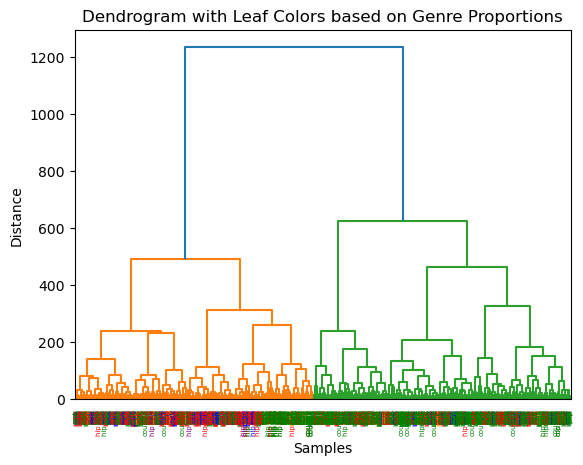

In [26]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have the DataFrame 'df' containing your data

# Data preparation
data = df[df['Genre'].isin(['pop', 'indie', 'rock', 'country', 'hip hop'])][['Danceability', 'Energy', 'Valence']]
genres = df[df['Genre'].isin(['pop', 'indie', 'rock', 'country', 'hip hop'])]['Genre']

# Perform hierarchical clustering
linkage_matrix = shc.linkage(data, method='ward')
dend = shc.dendrogram(linkage_matrix, labels=genres.values)

# Calculate proportion of each genre in each cluster
genre_counts = pd.Series(genres).value_counts()
genre_proportions = genre_counts / len(genres)

# Assign colors based on genre proportions
color_map = {
    'pop': 'red',
    'indie': 'blue',
    'rock': 'green',
    'country': 'orange',
    'hip hop': 'purple'
}

leaf_colors = [color_map[genre] for genre in genres]

# Color the leaves of the dendrogram
for i, color in enumerate(leaf_colors):
    plt.gca().get_xticklabels()[i].set_color(color)

# Show the plot
plt.title("Dendrogram with Leaf Colors based on Genre Proportions")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()


In [5]:
# filter data till 1980s
df_1980s = df[df['Year'] < 1990]
df_1990sto2010s =  df[(df['Year'] >= 1990)]

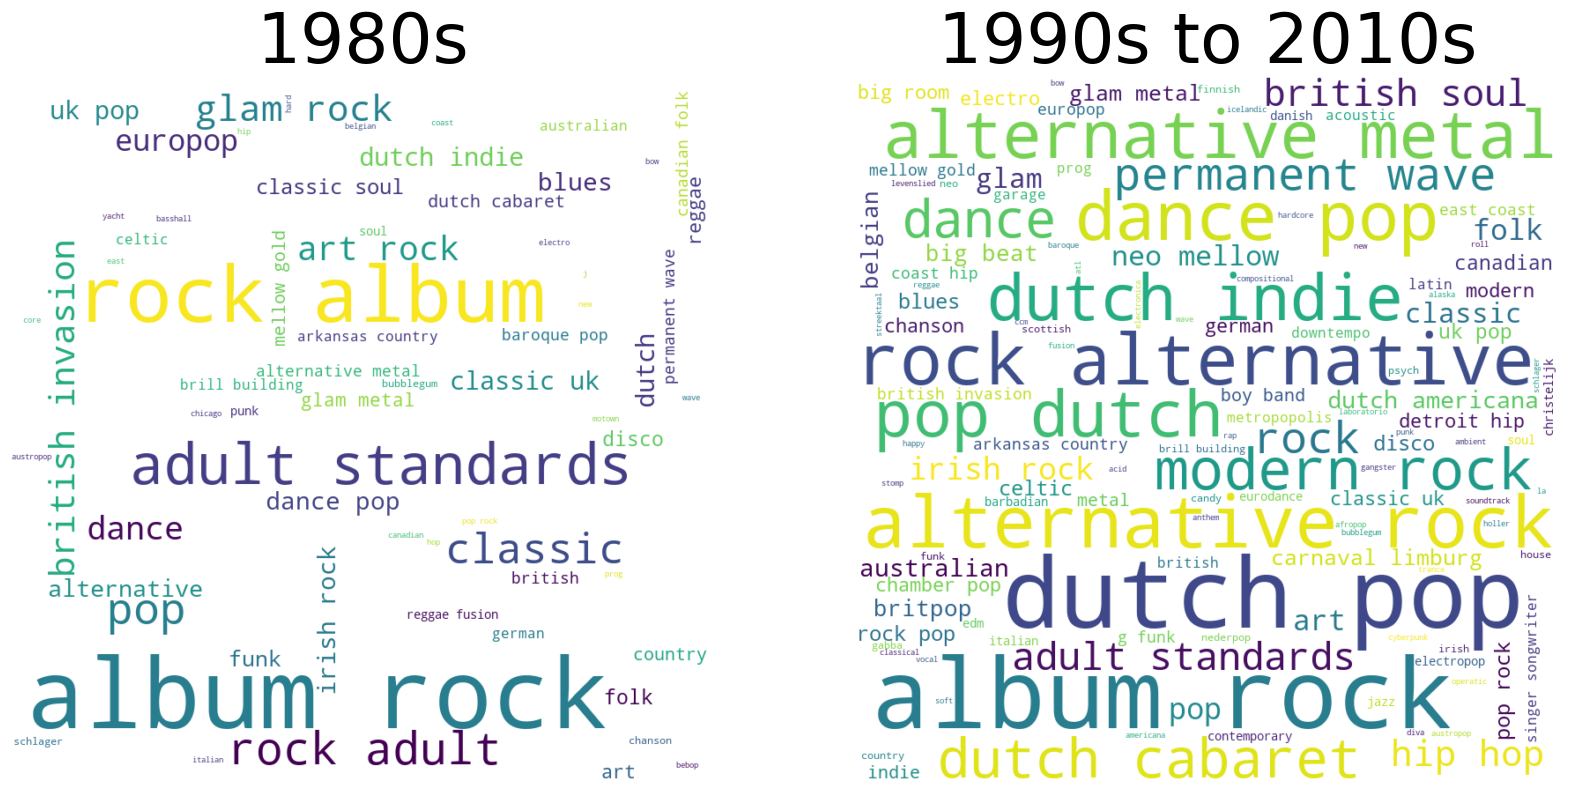

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
wordcloud = WordCloud(width=800, height=800, background_color='white', random_state=21, max_font_size=110).generate(' '.join(df_1980s['Top Genre']))
ax[0].imshow(wordcloud, interpolation="bilinear")
ax[0].set_title('1980s', fontsize=50)  # Increase the fontsize to 20
ax[0].axis('off')
wordcloud = WordCloud(width=800, height=800, background_color='white', random_state=21, max_font_size=110).generate(' '.join(df_1990sto2010s['Top Genre']))
ax[1].imshow(wordcloud, interpolation="bilinear")
ax[1].set_title('1990s to 2010s', fontsize=50)  # Increase the fontsize to 20
ax[1].axis('off')
plt.show()

In [7]:
path_dataset2 = "./dataset/albumlist.csv"
dataset = pd.read_csv(path_dataset2)

In [8]:
genres_list = dataset['Genre'].value_counts()
count_map = {}
for genres in genres_list.keys():
    count = genres_list[genres]
    genres = genres.strip()
    split_genres = genres.split(',')
    for genre in split_genres:
        genre = genre.strip(" & ")
        if genre in count_map.keys():
            count_map[genre] = count_map[genre] + count
        else:
            count_map[genre] = count
count_map = dict(sorted(count_map.items(), key=lambda item: item[1], reverse=True))



In [9]:
import plotly.express as px

# Create a new DataFrame to store the data for the plot
data = []

# Specify the order of genres
all_genres = ["Rock","Funk / Soul","Pop","Electronic"]

# Loop over each decade
for start_year in range(1960, 2001, 10):
    end_year = start_year + 9
    filtered_dataset = dataset[(dataset['Year'] >= start_year) & (dataset['Year'] <= end_year)]
    genre_albums = {genre: 0 for genre in all_genres}
    counts = filtered_dataset['Genre'].value_counts()
    for genres in counts.index:
        count = counts[genres]
        genres = genres.strip()
        split_genres = genres.split(',')
        for genre in split_genres:
            genre = genre.strip(" & ")
            if genre in genre_albums:
                genre_albums[genre] += count
    for genre, count in genre_albums.items():
        data.append({'Decade': str(start_year) + 's', 'Genre': genre, 'Number of Albums': count})

# Convert the data to a DataFrame
df = pd.DataFrame(data)
df = df[df['Genre'].isin(all_genres)]
# Create the animated bar chart
fig = px.bar(df, x='Number of Albums', y='Genre', animation_frame='Decade', orientation='h', 
             range_x=[0, df['Number of Albums'].max()], 
             category_orders={'Genre': all_genres})

# Show the plot
fig.show()

c:\Users\Milan Anand Raj\anaconda3\envs\CS661\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



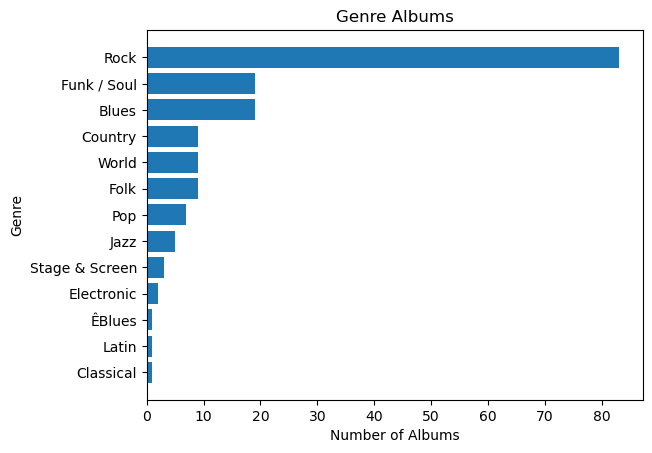

In [10]:
# initialize a dictionary to store the number of albums for each genre
# Take input for the decade
decade = input("Enter the decade (e.g., 1960s, 1970s, 1980s, 1990s, 2000s): ")

# Extract the start and end years from the input decade
start_year = int(decade[:4])
end_year = int(decade[:3] + "9")

# Filter the dataset based on the start and end years
filtered_dataset = dataset[(dataset['Year'] >= start_year) & (dataset['Year'] <= end_year)]

genre_albums = {}
counts = filtered_dataset['Genre'].value_counts()
for genres in counts.index:
    # split the genres string by ','
    count = counts[genres]
    genres = genres.strip()
    split_genres = genres.split(',')
    
    for genre in split_genres:
        genre = genre.strip(" & ")
        # if the genre is not in the dictionary, add it with the count
        if genre not in genre_albums:
            genre_albums[genre] = count
        # if the genre is already in the dictionary, add the count to the existing count
        else:
            genre_albums[genre]= genre_albums[genre] + count

# Sort the dictionary by the number of albums
sorted_genre_albums = sorted(genre_albums.items(), key=lambda x: x[1], reverse=False)
# Extract the genres and counts from the sorted dictionary
genres = [genre for genre, count in sorted_genre_albums]
counts = [count for genre, count in sorted_genre_albums]

# Plot the histogram with horizontal bars
plt.barh(range(len(genres)), counts)
plt.ylabel('Genre')
plt.xlabel('Number of Albums')
plt.title('Genre Albums')

# Set the y-axis labels to the genres
plt.yticks(range(len(genres)), genres)

# Show the plot
plt.show()
